--- Part 1: CNN for Fashion MNIST ---
Loading Fashion MNIST dataset...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Building the CNN model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,906 (3.42 MB)

 Trainable params: 896,906 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the model...
Training the model...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8039 - loss: 0.5368 - val_accuracy: 0.8869 - val_loss: 0.3081
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9066 - loss: 0.2562 - val_accuracy: 0.9083 - val_loss: 0.2533
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9235 - loss: 0.2084 - val_accuracy: 0.9096 - val_loss: 0.2483
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9363 - loss: 0.1715 - val_accuracy: 0.9161 - val_loss: 0.2380
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9479 - loss: 0.1393 - val_accuracy: 0.9168 - val_loss: 0.2437
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9570 - loss: 0.1158 - val_accuracy: 0.9235 - val_loss: 0.2471
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9650 - loss: 0.0929 - val_accuracy: 0.9203 - val_loss: 0.2789
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11

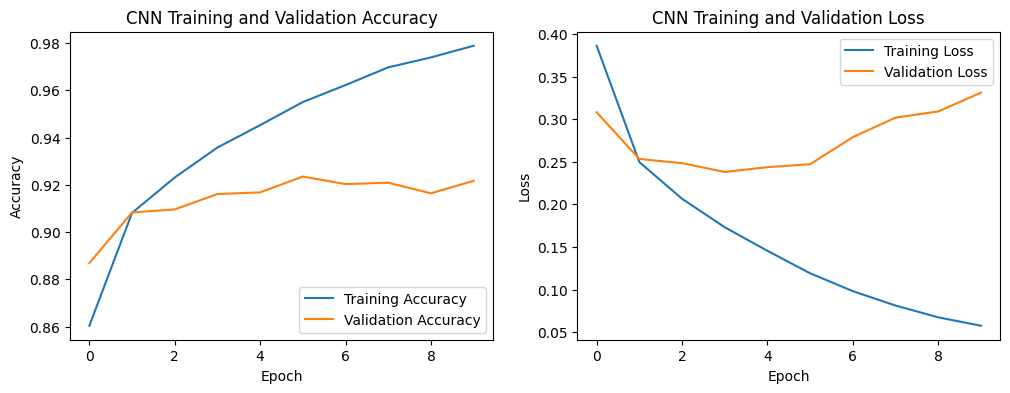

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

print("--- Part 1: CNN for Fashion MNIST ---")

### 1. Load and Preprocess the Data
print("Loading Fashion MNIST dataset...")
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0


IMG_HEIGHT = 28
IMG_WIDTH = 28
CHANNELS = 1

train_images = train_images.reshape((-1, IMG_HEIGHT, IMG_WIDTH, CHANNELS))
test_images = test_images.reshape((-1, IMG_HEIGHT, IMG_WIDTH, CHANNELS))

print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

# Define class names for plotting
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
NUM_CLASSES = 10

### 2. Build the CNN Model
print("Building the CNN model...")

model_cnn = models.Sequential([
    # Input layer
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),

    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),

    # Flatten the 3D features to 1D
    layers.Flatten(),

    # Dense (fully connected) layers
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax') # Output layer
])

model_cnn.summary()

### 3. Compile the Model
print("Compiling the model...")
model_cnn.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

### 4. Train the Model
print("Training the model...")
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_images,
    train_labels,
    epochs=EPOCHS,
    validation_data=(test_images, test_labels)
)

### 5. Evaluate the Model
print("\nEvaluating on test data...")
test_loss, test_acc = model_cnn.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc*100:.2f}%')

### 6. Plot Training History (Good for your report)
print("Plotting training history...")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('CNN Training and Validation Loss')
plt.show()